# San Francisco Salaries

In [1]:
import pandas as pd

### Erstelle aus salaries.csv einen DataFrame

In [2]:
sal = pd.read_csv("./data/salaries.csv", na_values=['Not Provided']).fillna(0)

C:\Users\fabia\AppData\Local\Temp\ipykernel_31720\1334023201.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  sal = pd.read_csv("./data/salaries.csv", na_values=['Not Provided']).fillna(0)


** Empfohlen: `head()` **

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Wie viele Observations gibt es?

In [ ]:
# https://pandas.pydata.org/docs/user_guide/basics.html
obs = sal['BasePay'].count()
print(obs)

148045


### Was ist das arithmetische Mittel von `BasePay`?
Lösung: `66325.44884050643`

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean
mean = sal['BasePay'].mean()
print(mean)

66325.4488404877


### Was ist der höchste Geldbetrag, der als `OvertimePay` vorhanden ist?
Lösung: `245131.88`

In [ ]:
# https://pandas.pydata.org/docs/user_guide/basics.html
max = sal['OvertimePay'].max()
print(max)

245131.88


### Welchen Job hat JOSEPH DRISCOLL? (**Nicht** Joseph Driscoll).
Lösung:
```
CAPTAIN, FIRE SUPPRESSION
```

In [6]:
job = sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']
print(job)

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object


### Was ist das Gesamtgehalt von JOSEPH DRISCOLL?
Lösung:
```
270324.91
```

In [7]:
sum = sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']
print(sum)

24    270324.91
Name: TotalPayBenefits, dtype: float64


### Wie lautet der Name der bestverdienensten Person?
Lösung: `NATHANIEL FORD`

In [ ]:
best = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]['EmployeeName']
print(best)

0    NATHANIEL FORD
Name: EmployeeName, dtype: object


### Wie lautet der Name der am schlechtest bezahlten Person?
Lösung: `Joe Lopez`

In [9]:
lowest = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]['EmployeeName']
print(lowest)

148653    Joe Lopez
Name: EmployeeName, dtype: object


### Ermittle für die Jahre 2012-2014 den arithmetischen Mittelwert des `BasePay`s aller Personen.
Lösung:
```
Year
2012    65436.406857
2013    69630.030216
2014    66564.421924
```


In [10]:
# https://pandas.pydata.org/docs/user_guide/10min.html#grouping
average_base_pay = sal[sal['Year'].isin([2012, 2013, 2014])].groupby('Year')['BasePay'].mean()
print(average_base_pay)

Year
2012    65436.406857
2013    68509.832156
2014    66557.437750
Name: BasePay, dtype: float64


### Wie viele unterschiedliche Jobs gibt es?
Lösung: `2159`

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html#pandas.Series.nunique
diff = sal['JobTitle'].nunique()
print(diff)

2159


### Welche sind die Top 5 häufigsten Jobs und wie viele gibt es davon jeweils?
Lösung:
```
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64
```


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
top = sal['JobTitle'].value_counts().head(5)
print(top)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64


### Wie viele Jobs gibt es, die 2013 nur eine Person ausübte?
Lösung: `202`

In [15]:
jobs = sal[sal['Year'] == 2013]['JobTitle'].value_counts()
print(jobs[jobs == 1].count())

202


### Wie viele Personen haben `'chief'` (caseinsensitive) im Jobnamen?
Lösung: `627`

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
jobs = sal['JobTitle'].str.contains('chief', case=False)
print(jobs.sum())

627


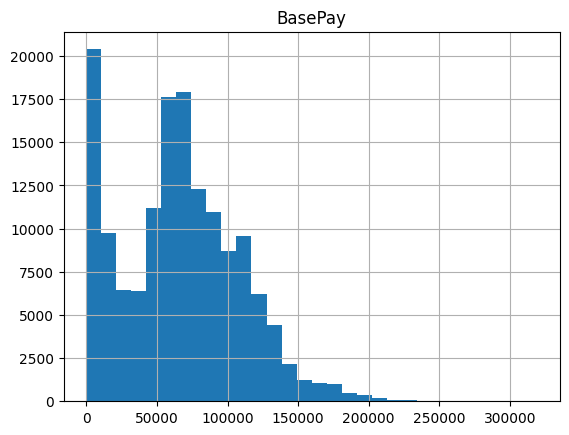

In [12]:
### Erstelle ein Histogramm
hist = sal.hist(bins=30, column='BasePay')